**Telmai AI**

In [ ]:
%cd smart_dq_anamoly

/content/Innovation-Hub/smart_dq_anamoly


In [ ]:
import sys, os

project_root = os.getcwd()
print(project_root)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(f"✅ Added to sys.path: {project_root}")

/content/Innovation-Hub/smart_dq_anamoly
✅ Added to sys.path: /content/Innovation-Hub/smart_dq_anamoly


In [ ]:
!pip install pyod -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 11.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime, timedelta


In [ ]:
!pwd

/content/Innovation-Hub/smart_dq_anamoly


In [ ]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import sys
sys.path.append('/content/Innovation-Hub/smart_dq_anamoly')
import importlib


In [ ]:
import importlib
# import datagenerator.generator
# importlib.reload(datagenerator.generator)

from datagenerator.generator import generate_wealth_management_data


In [ ]:
df = generate_wealth_management_data(
    start_date='2023-01-01',
    end_date='2025-01-10',
    num_customers=100,
    num_accounts_per_customer=2,
    daily_records=100
)


✅ Step 1: Initializing data generation process...
🗓️  Generating data for 741 days → 2023-01-01 to 2025-01-10

✅ Step 2: Creating customer profiles...
👤 Total customers: 100

✅ Step 3: Creating account structures...
🏦 Created 176 accounts for 100 customers

✅ Step 4: Generating daily transaction and account data...
📊 Expected total records: 74,100
🔄 Day 1/741 → 2023-01-01
🔄 Day 5/741 → 2023-01-05
🔄 Day 10/741 → 2023-01-10
🔄 Day 15/741 → 2023-01-15
🔄 Day 20/741 → 2023-01-20
🔄 Day 25/741 → 2023-01-25
🔄 Day 30/741 → 2023-01-30
🔄 Day 35/741 → 2023-02-04
🔄 Day 40/741 → 2023-02-09
🔄 Day 45/741 → 2023-02-14
🔄 Day 50/741 → 2023-02-19
🔄 Day 55/741 → 2023-02-24
🔄 Day 60/741 → 2023-03-01
🔄 Day 65/741 → 2023-03-06
🔄 Day 70/741 → 2023-03-11
🔄 Day 75/741 → 2023-03-16
🔄 Day 80/741 → 2023-03-21
🔄 Day 85/741 → 2023-03-26
🔄 Day 90/741 → 2023-03-31
🔄 Day 95/741 → 2023-04-05
🔄 Day 100/741 → 2023-04-10
🔄 Day 105/741 → 2023-04-15
🔄 Day 110/741 → 2023-04-20
🔄 Day 115/741 → 2023-04-25
🔄 Day 120/741 → 2023-04-

In [ ]:
df.head(3)

,process_date,customer_id,account_id,account_type,risk_profile,relationship_manager,balance,market_condition,trend_factor,risk_adjusted_factor,account_type_factor,base_balance
0,2023-01-01,CUST000030,CUST000030_ACC001,INVESTMENT,HIGH,RM020,109669.98,0.7132,1.0,1.3,1.2,81051.73
1,2023-01-01,CUST000011,CUST000011_ACC001,RETIREMENT,LOW,RM008,469986.94,0.7132,1.0,0.7,0.9,521093.87
2,2023-01-01,CUST000062,CUST000062_ACC001,SAVINGS,MEDIUM,RM021,50750.97,0.7132,1.0,1.0,0.8,60291.90


In [ ]:
df.columns

Index(['process_date', 'customer_id', 'account_id', 'account_type',
       'risk_profile', 'relationship_manager', 'balance', 'market_condition',
       'trend_factor', 'risk_adjusted_factor', 'account_type_factor',
       'base_balance'],
      dtype='object')

**Step 2: Convert to time series format**

In [ ]:
# Step 2: Convert to time series format
from datagenerator.wealth_time_series_converter import WealthTimeSeriesConverter

converter = WealthTimeSeriesConverter()
time_series_df = converter.prepare_for_lstm(df)

✅ WealthTimeSeriesConverter initialized

🚀 Starting full time series preparation pipeline for LSTM model...

🔹 Step 1: Converting to continuous time series format...
Found 176 unique accounts.
Data spans from 2023-01-01 to 2025-01-10.
Processed 10/176 accounts
Processed 20/176 accounts
Processed 30/176 accounts
Processed 40/176 accounts
Processed 50/176 accounts
Processed 60/176 accounts
Processed 70/176 accounts
Processed 80/176 accounts
Processed 90/176 accounts
Processed 100/176 accounts
Processed 110/176 accounts
Processed 120/176 accounts
Processed 130/176 accounts
Processed 140/176 accounts
Processed 150/176 accounts
Processed 160/176 accounts
Processed 170/176 accounts
Processed 176/176 accounts
✅ Completed time series conversion: 147800 rows created.

🔹 Step 2: Filtering accounts with sufficient history...
From 176 accounts, retained 176 accounts having >= 30 days.
Final row count after filtering: 147800

🔹 Step 3: Adding derived features for anomaly detection...
Feature engine

In [ ]:
time_series_df.head(5)

,process_date,account_id,customer_id,account_type,risk_profile,relationship_manager,balance,market_condition,trend_factor,risk_adjusted_factor,...,base_balance,day_of_week,day_of_month,month,is_month_end,balance_7d_mean,balance_7d_std,balance_change,balance_pct_change,balance_zscore
0,2023-01-01,CUST000030_ACC001,CUST000030,INVESTMENT,HIGH,RM020,109669.98,0.7132,1.0000,1.3,...,81051.73,6,1,1,0,109669.980,NaN,0.00,0.000000,NaN
1,2023-01-01,CUST000030_ACC001,CUST000030,INVESTMENT,HIGH,RM020,61281.02,0.7132,1.0000,1.3,...,47143.68,6,1,1,0,85475.500,34216.161751,-48388.96,-0.441223,-0.707107
2,2023-01-02,CUST000030_ACC001,CUST000030,INVESTMENT,HIGH,RM020,59364.67,-0.6225,1.0001,1.3,...,52184.84,0,2,1,0,76771.890,28506.689453,-1916.35,-0.031272,-0.610636
3,2023-01-03,CUST000030_ACC001,CUST000030,INVESTMENT,HIGH,RM020,59364.67,-0.6225,1.0001,1.3,...,52184.84,1,3,1,0,72420.085,24849.689255,0.00,0.000000,-0.525375
4,2023-01-04,CUST000030_ACC001,CUST000030,INVESTMENT,HIGH,RM020,65534.36,-0.9610,1.0004,1.3,...,59741.89,2,4,1,0,71042.940,21739.662689,6169.69,0.103929,-0.253388


# Group by account_id
results = detector.detect_anomalies_by_group(
    df=time_series_df,
    group_by='account_id',
    target_columns=['balance', 'transaction_amount'],
    timestamp_col='process_date'
)

# Group by risk_profile
results = detector.detect_anomalies_by_group(
    df=time_series_df,
    group_by='risk_profile',
    target_columns='balance',
    timestamp_col='process_date'
)

# Group by multiple columns
results = detector.detect_anomalies_by_group(
    df=time_series_df,
    group_by=['region', 'product_type'],
    target_columns='sales',
    timestamp_col='date'
)

**2. Analyze Multiple Columns**

# Analyze multiple columns for each group
results = detector.detect_anomalies_by_group(
    df=time_series_df,
    group_by='account_id',
    target_columns=['balance', 'transaction_count', 'market_condition'],
    timestamp_col='process_date'
)

# Analyze multiple columns without grouping
results = detector.detect_anomalies_multiple_columns(
    df=time_series_df,
    target_columns=['balance', 'revenue', 'cost'],
    timestamp_col='date'
)

In [ ]:
time_series_df.columns

Index(['process_date', 'account_id', 'customer_id', 'account_type',
       'risk_profile', 'relationship_manager', 'balance', 'market_condition',
       'trend_factor', 'risk_adjusted_factor', 'account_type_factor',
       'base_balance', 'day_of_week', 'day_of_month', 'month', 'is_month_end',
       'balance_7d_mean', 'balance_7d_std', 'balance_change',
       'balance_pct_change', 'balance_zscore'],
      dtype='object')

In [ ]:
!pwd

/content/Innovation-Hub/smart_dq_anamoly


In [ ]:
import sys
# sys.path.append('/content/Innovation-Hub/smart_dq_anamoly')

from test_import.core_utils import say_hello
print(say_hello("Test Passed ✅"))

Hello, Test Passed ✅!


In [ ]:
# import sys
# sys.path.append('/content/Innovation-Hub/smart_dq_anamoly')

# from deep_anomaly import detection_module
# print(dir(detection_module))


In [ ]:
from deep_anomaly.core_pipeline import run_anomaly_detection
from deep_anomaly.FlexibleAnomalyDetector import FlexibleAnomalyDetector


**parameter explantion**

seq_length: 14
==============
Purpose: Defines how many time steps (e.g., 14 days) are used as one input sequence to the LSTM autoencoder.
Why it's important: LSTMs learn temporal patterns — a 14-day sequence allows the model to learn weekly or biweekly patterns and detect deviations from those.
Effect: If an event disrupts this learned pattern (e.g., sudden spike/drop in a 14-day cycle), it can trigger an anomaly.

hidden_dim: 64
==============

Purpose: The number of neurons in each hidden layer of the LSTM.
Why it's important: It defines the capacity of the model to learn complex patterns. Larger values can model more intricate relationships, but may overfit on small datasets.
Effect: Helps the autoencoder reconstruct the sequence accurately. Poor reconstructions → higher reconstruction error → potential anomaly.


layer_dim: 2
=============
Purpose: The number of LSTM layers stacked together.
Why it's important: Deeper LSTM models (multiple layers) can capture hierarchical or deeper temporal features.
Effect: With more layers, the model can detect more subtle patterns, which helps detect anomalies that only emerge in longer-term behaviors.

epochs: 50
=========
Purpose: Number of training iterations for the autoencoder.
Why it's important: Controls how long the model trains. Too few = underfitting; too many = overfitting.
Effect: Helps the model converge and learn a good baseline of “normal” sequences. This baseline is critical for identifying anomalies via reconstruction error.

contamination: 0.01
===================
Purpose: A prior estimate of the proportion of anomalies in the dataset (here, 1%).
Why it's important: Used during threshold setting for detecting anomalies (especially in statistical/ML-based layers).
Effect: Determines how aggressive the detector is. For example:
Low contamination: only top 1% most deviant points are flagged.
High contamination: more anomalies are detected, but may include false positives.

In [ ]:
detector = FlexibleAnomalyDetector(
    default_config={
        'seq_length': 14,          # 14 days sequence
        'hidden_dim': 64,
        'layer_dim': 2,
        'epochs': 50,
        'contamination': 0.01      # Expect 1% anomalies
    }
)

In [ ]:
#For each account, run separate anomaly detection for both balance and market_condition columns
"""
Each analysis creates a separate LSTM autoencoder model

So if you have 25 unique account IDs, it would run anomaly detection 50 times (25 accounts × 2 columns). This explains why it's taking a long time to complete.
Each of these 50 runs involves:

Training an LSTM autoencoder with your configuration (50 epochs per model)
Multiple layers of anomaly detection (statistical, seasonal, and deep learning)
Generating visualizations for each account/column pair
"""
# results = detector.detect_anomalies_by_group(
#     df=time_series_df,
#     group_by='account_id',
#     target_columns=['balance', 'market_condition'], # Required columns for which i wanted run anomoly
#     timestamp_col='process_date',
#     visualize=True,
#     output_dir='anomaly_results_accounts'
# )

"\nEach analysis creates a separate LSTM autoencoder model\n\nSo if you have 25 unique account IDs, it would run anomaly detection 50 times (25 accounts × 2 columns). This explains why it's taking a long time to complete.\nEach of these 50 runs involves:\n\nTraining an LSTM autoencoder with your configuration (50 epochs per model)\nMultiple layers of anomaly detection (statistical, seasonal, and deep learning)\nGenerating visualizations for each account/column pair\n"

In [ ]:
time_series_df.columns

Index(['process_date', 'account_id', 'customer_id', 'account_type',
       'risk_profile', 'relationship_manager', 'balance', 'market_condition',
       'trend_factor', 'risk_adjusted_factor', 'account_type_factor',
       'base_balance', 'day_of_week', 'day_of_month', 'month', 'is_month_end',
       'balance_7d_mean', 'balance_7d_std', 'balance_change',
       'balance_pct_change', 'balance_zscore'],
      dtype='object')

Analyzing 2 columns...

Analyzing column: balance

===== Time Series Anomaly Detection System =====
Analyzing column 'balance' in DataFrame with 147800 rows
Configuration initialized (device: cuda, model: lstm_ae)
Initialized DataPreprocessor with minmax scaler
Initialized DataManager with sequence length=14, test_size=0.2, batch_size=64

----- Data Preparation -----
Extracted column 'balance' from DataFrame
Fitted scaler and transformed data with shape (147800, 1)
Split data into train ((118240, 1)) and test ((29560, 1)) sets
Created dataset with 118227 sequences of length 14
Created dataset with 29547 sequences of length 14
Created DataLoaders with 1848 train batches and 462 test batches

----- Seasonality Analysis -----
Analyzing seasonality patterns in column 'balance'
Detected significant seasonality in the data
Weekly seasonality detected
Seasonality analysis complete

----- Model Creation -----
Initialized LSTMAutoencoder with input_dim=1, hidden_dim=64, layer_dim=2
Created mode

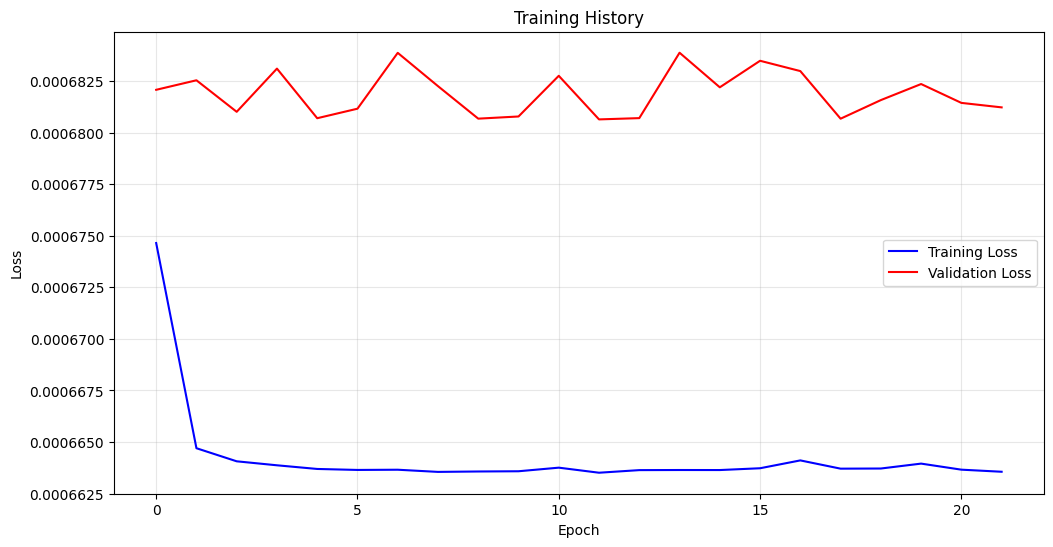

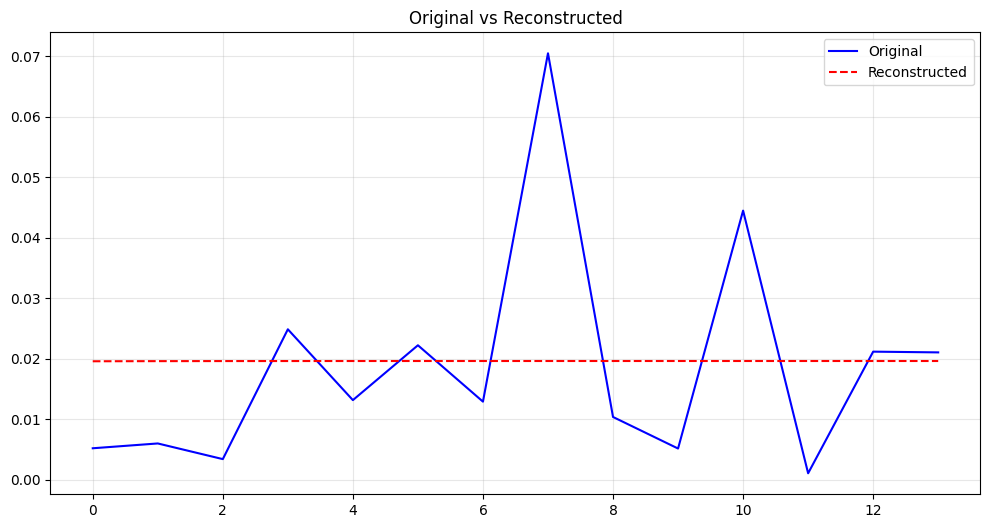

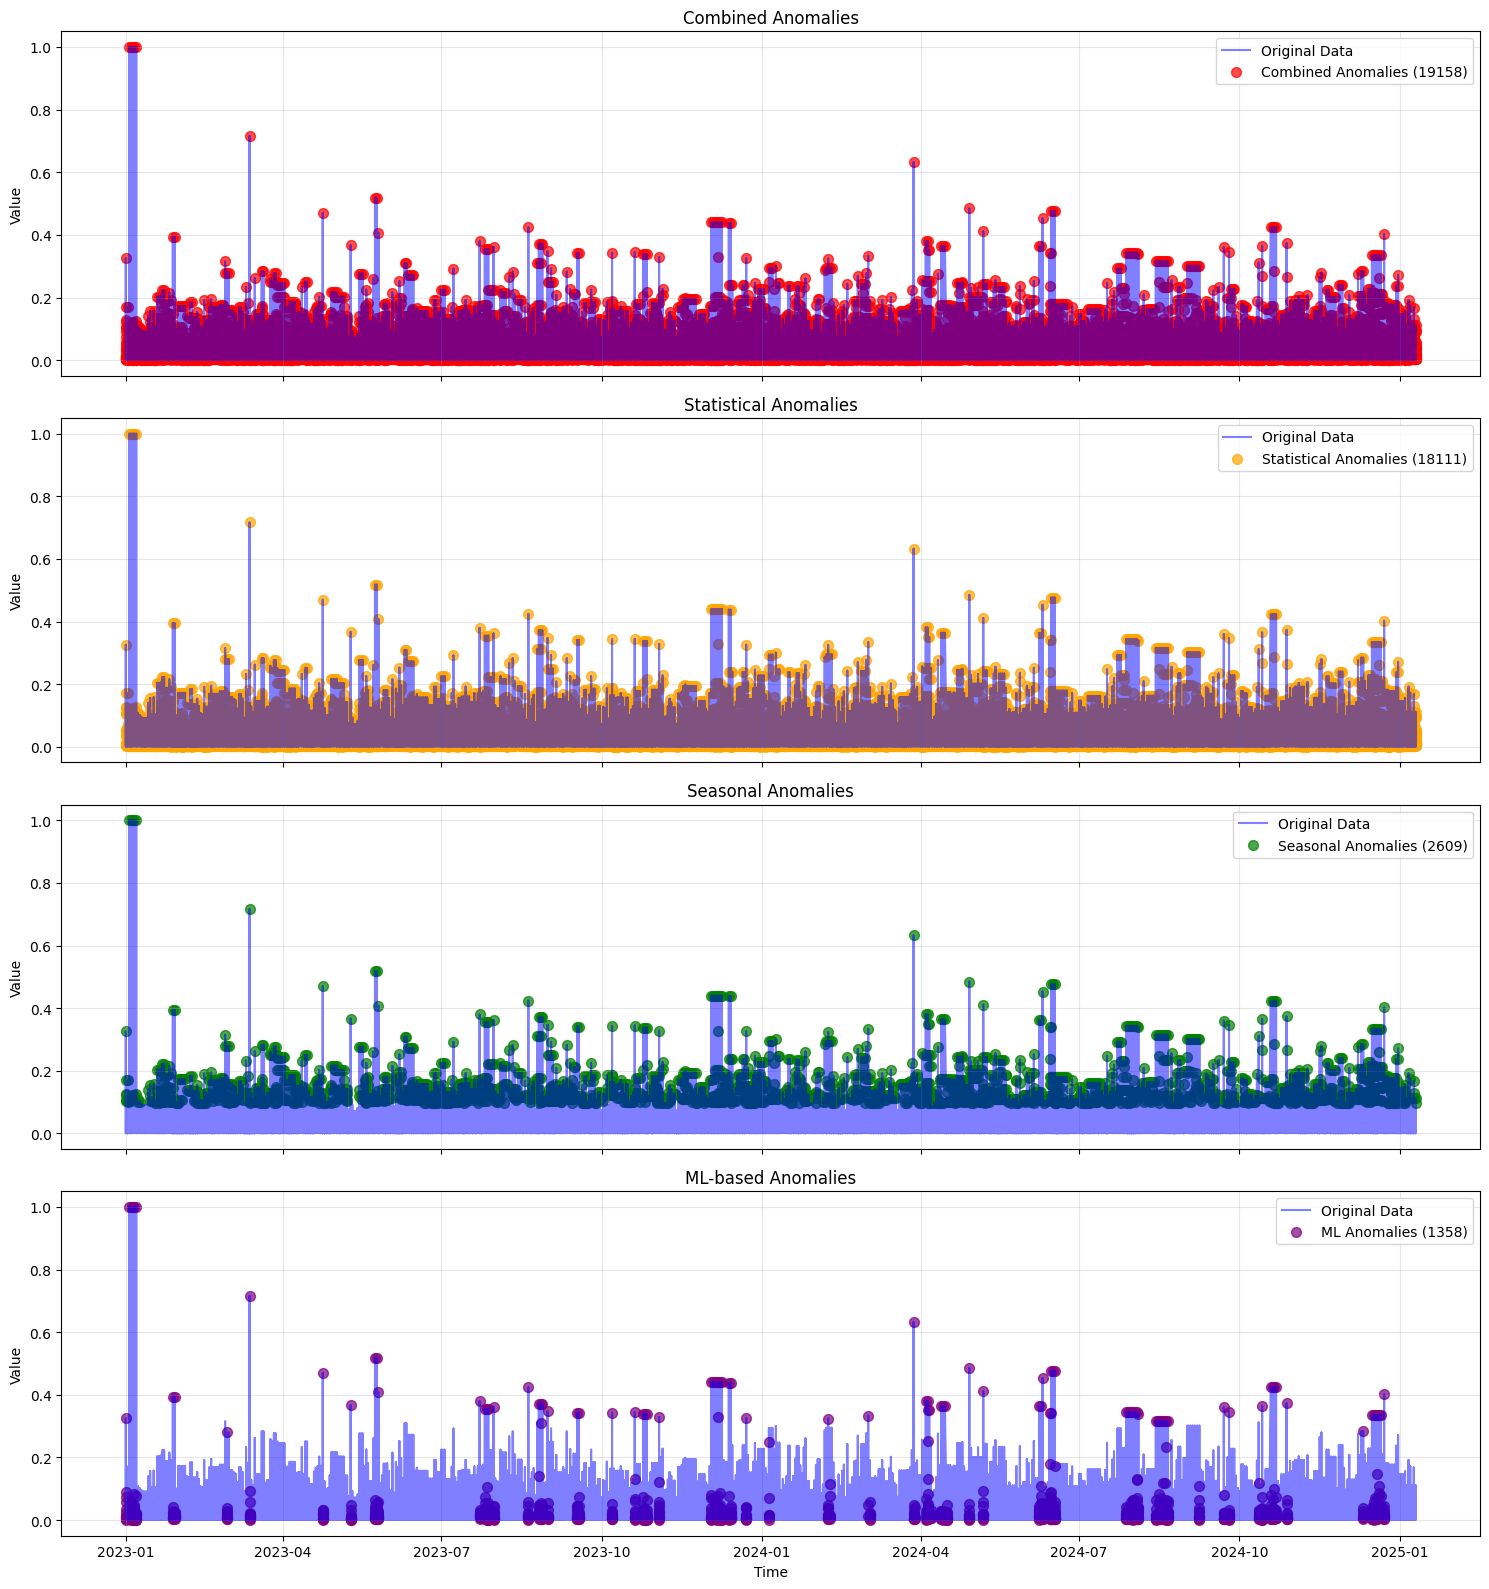

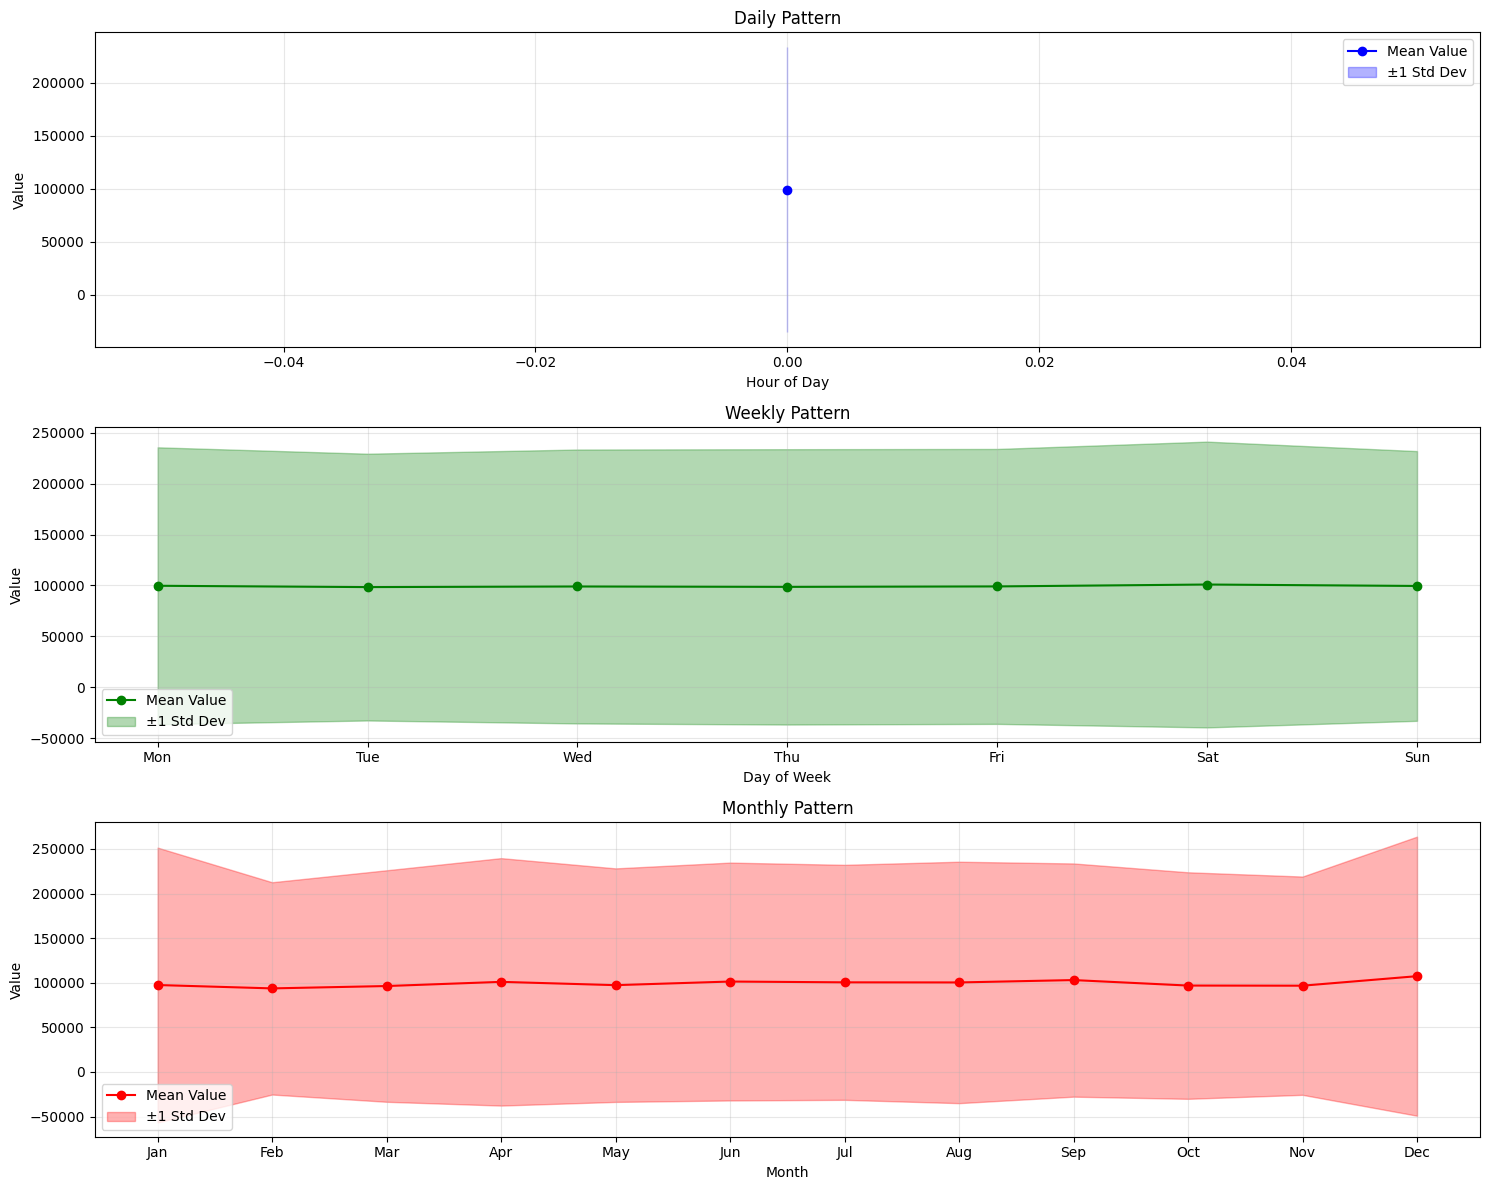

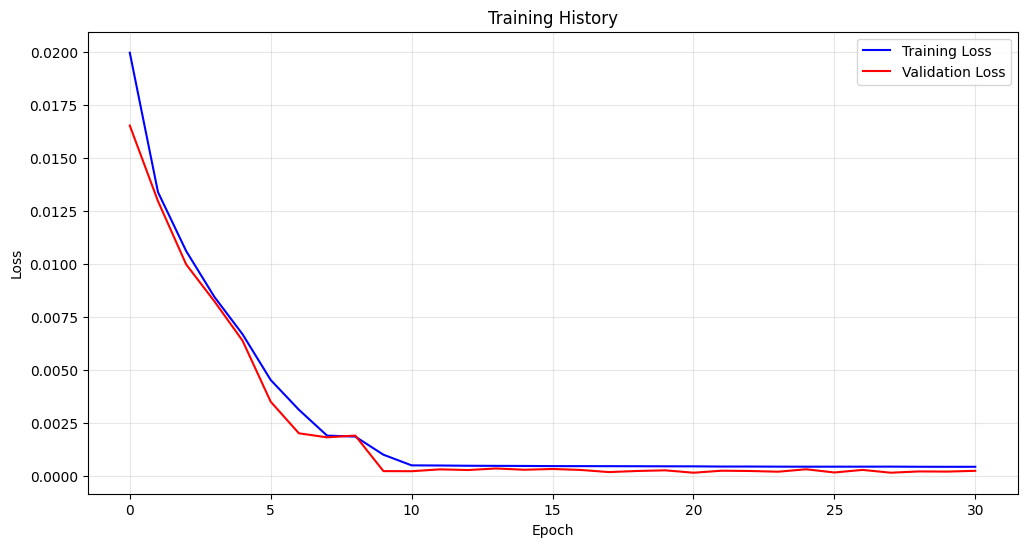

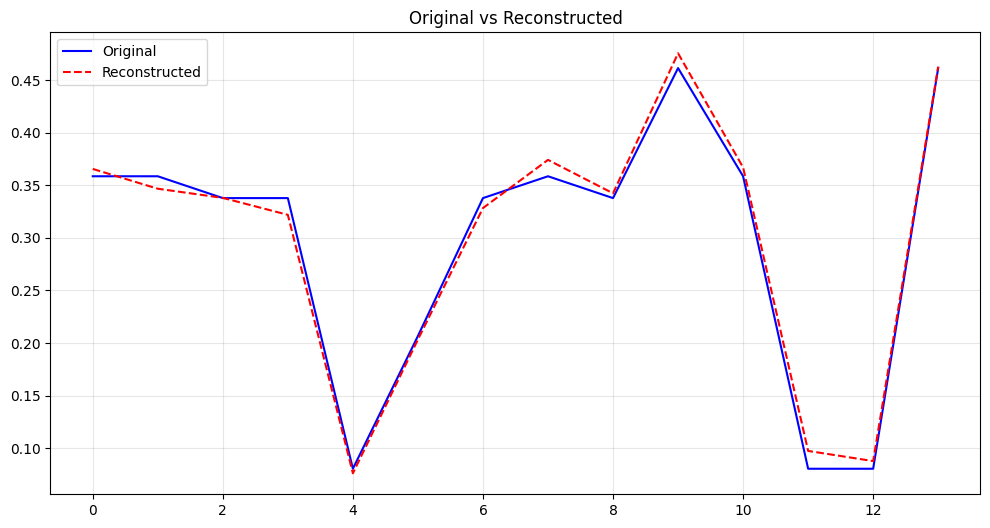

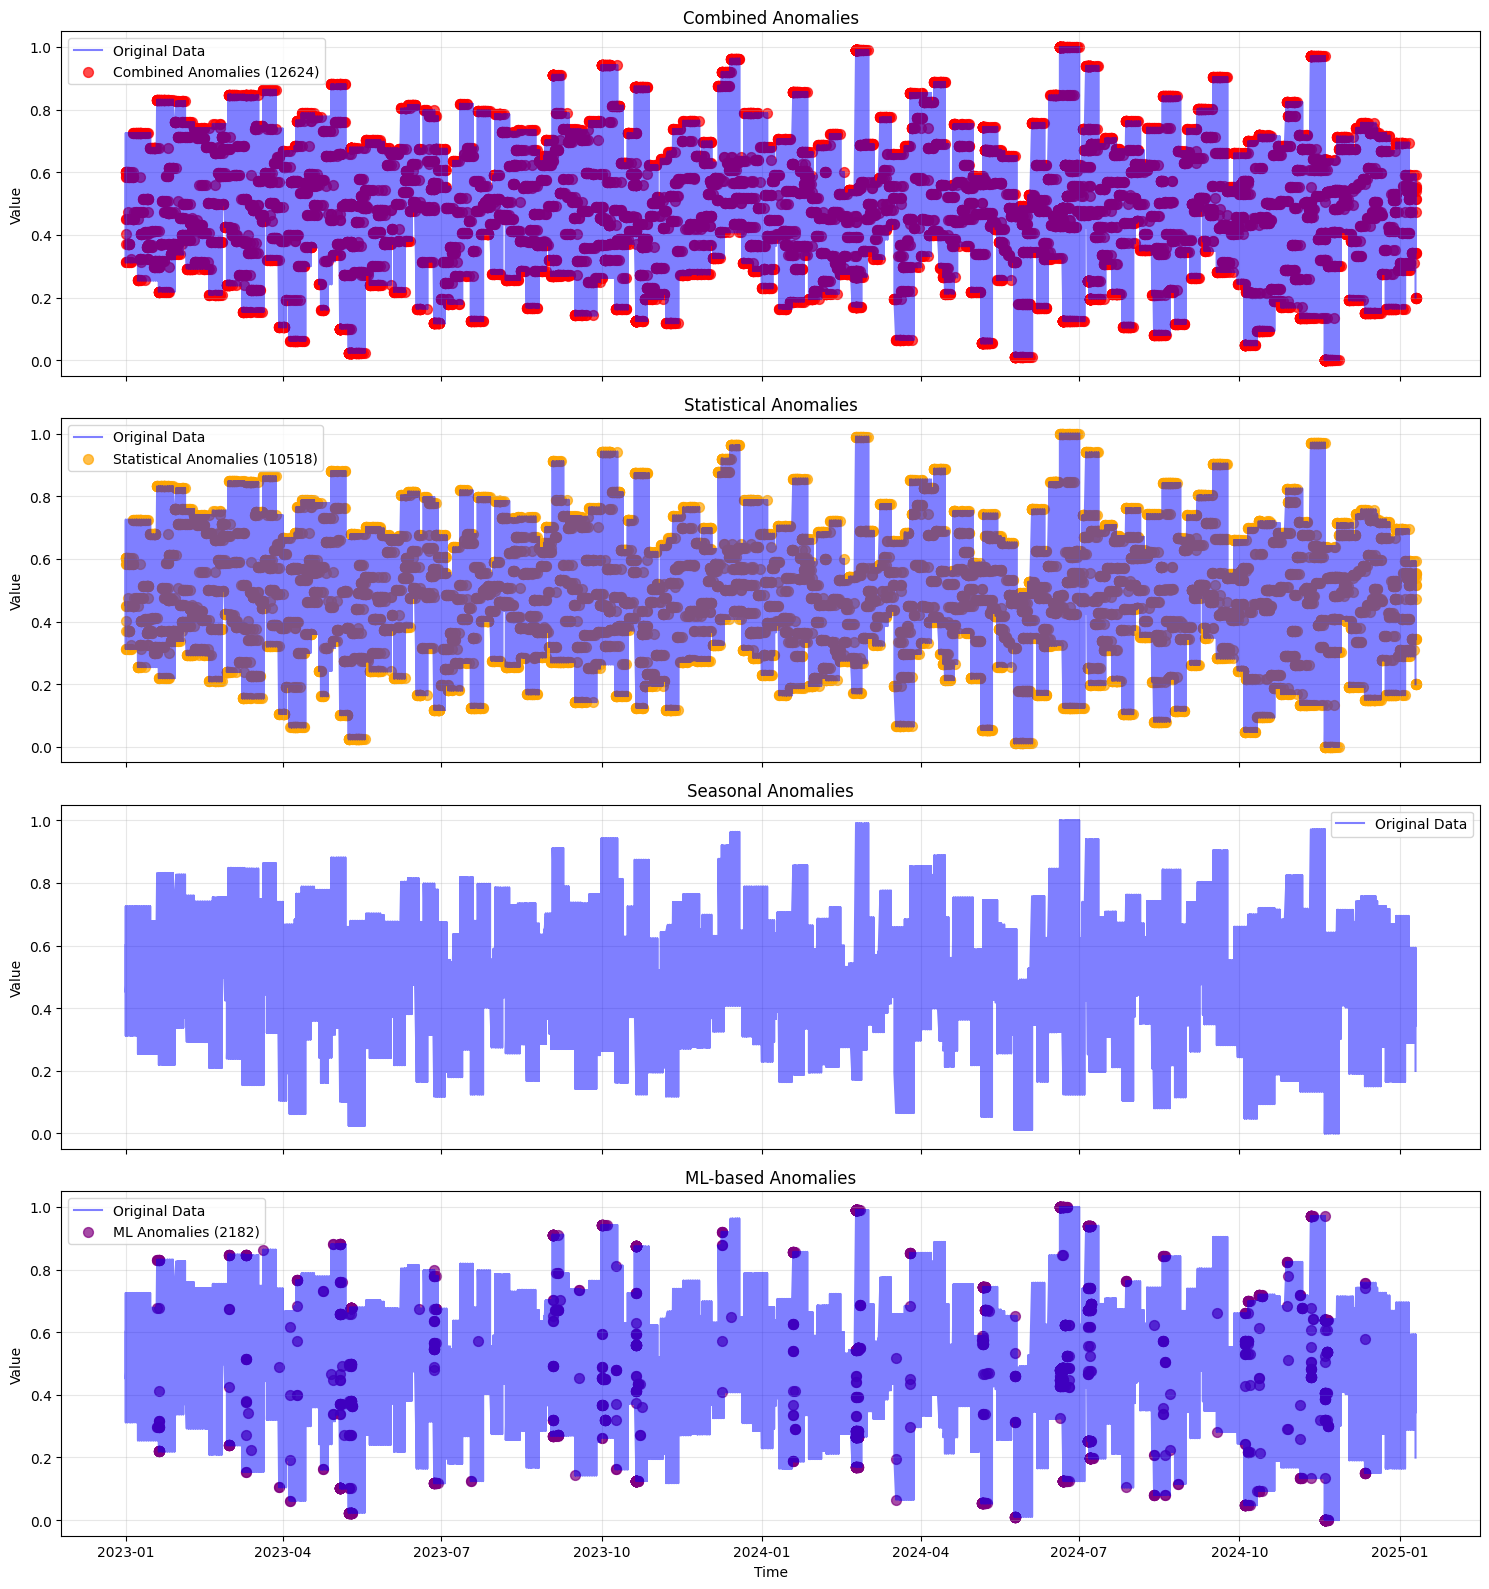

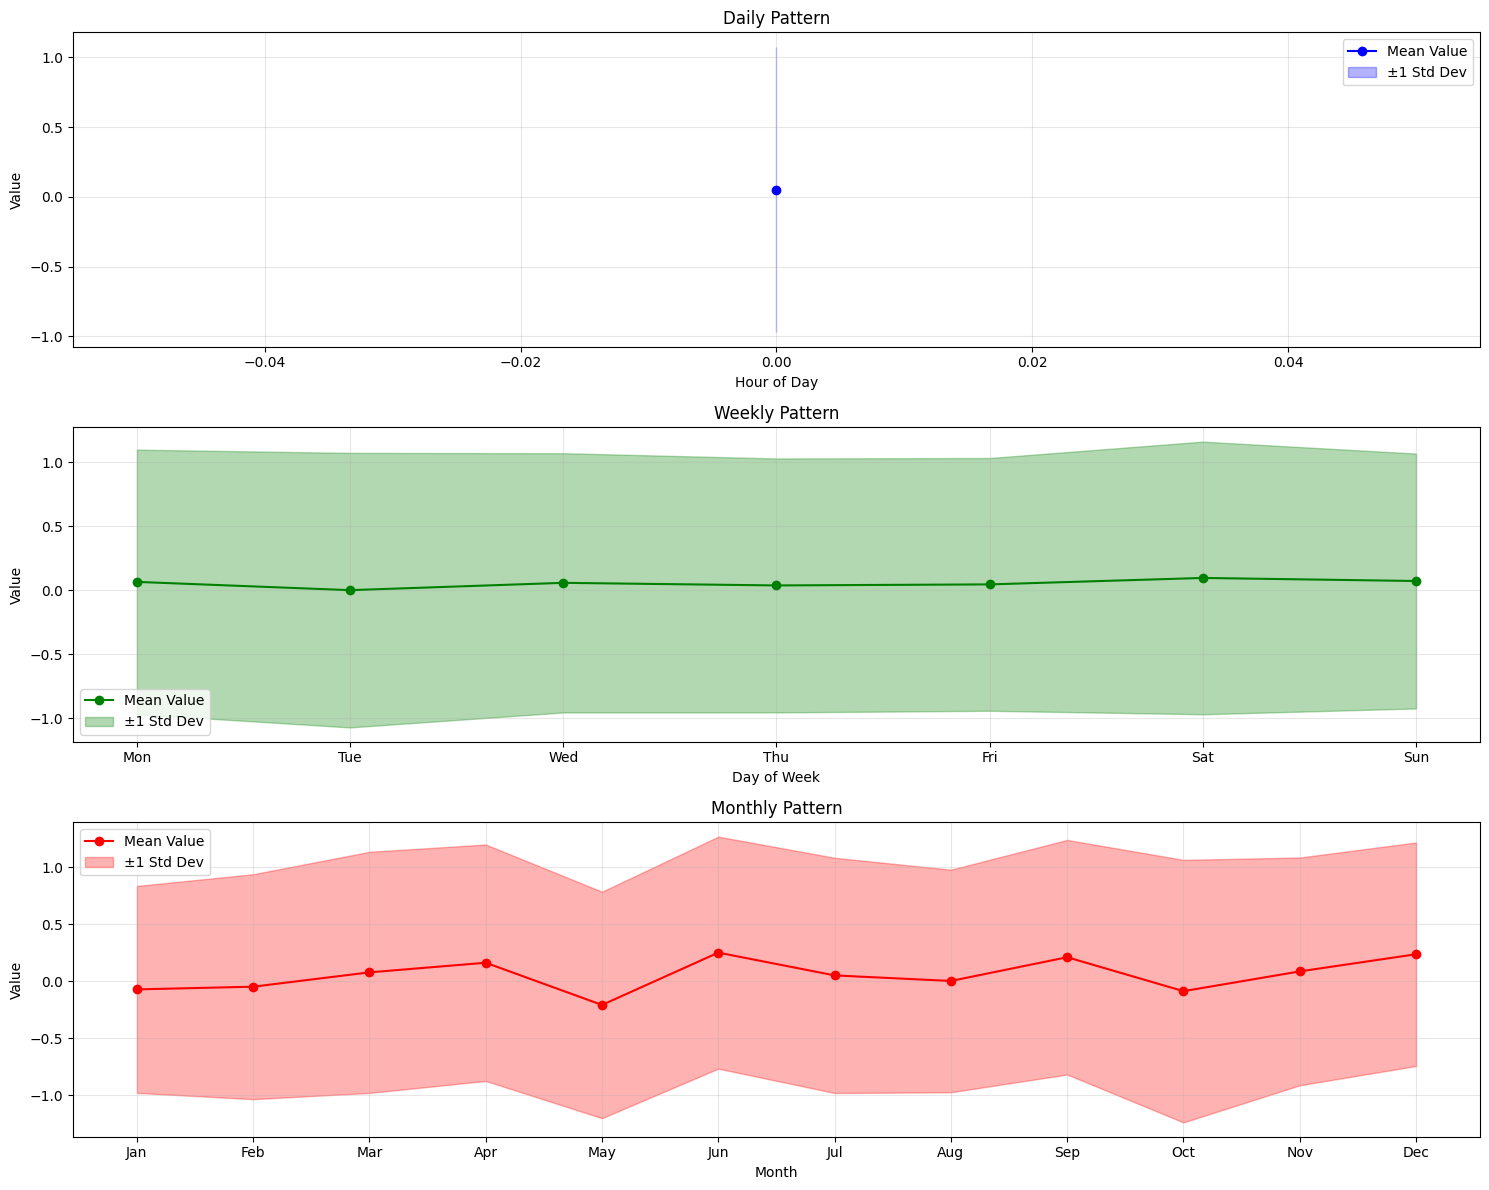

In [ ]:
# Detect anomalies across multiple columns without grouping
lstm_results = detector.detect_anomalies_multiple_columns(
    df=time_series_df,
    target_columns=['balance', 'market_condition'],
    timestamp_col='process_date',
    visualize=True,
    output_dir='anomaly_results_ungrouped'
)

In [ ]:
print(lstm_results.keys())


dict_keys(['balance', 'market_condition'])


In [ ]:
def display_all_anomalies(results_dict: dict, original_df: pd.DataFrame, timestamp_col: str):
    """
    Display anomaly samples for each result key in results_dict.

    Args:
        results_dict: Dictionary containing anomaly results per column.
        original_df: Original dataframe with all data.
        timestamp_col: The name of the timestamp column to show in output.
    """
    print("\n===== Anomaly Samples Summary =====\n")

    for target_col in results_dict:
        print(f"--- Anomalies for '{target_col}' ---")
        try:
            anomaly_indices = results_dict[target_col]['anomaly_indices']
            if not len(anomaly_indices):
                print("No anomalies detected.\n")
                continue

            sample_df = original_df.iloc[anomaly_indices][[timestamp_col, target_col]]
            print(f"Total anomalies detected: {len(anomaly_indices)}")
            print(sample_df.head(10).to_string(index=False))  # Display top 10
            print("\n")
        except KeyError as e:
            print(f"KeyError while processing '{target_col}': {e}\n")
        except Exception as e:
            print(f"Unexpected error for '{target_col}': {e}\n")


In [ ]:
display_all_anomalies(lstm_results, original_df=time_series_df, timestamp_col='process_date')


===== Anomaly Samples Summary =====

--- Anomalies for 'balance' ---
Total anomalies detected: 18320
process_date   balance
  2023-01-21 371056.88
  2023-01-23  11327.06
  2023-02-09 218916.14
  2023-02-09 119393.27
  2023-02-09  36451.26
  2023-03-04 192580.83
  2023-03-23 137418.91
  2023-03-24  10457.40
  2023-03-26 209550.37
  2023-03-27 209550.37


--- Anomalies for 'market_condition' ---
Total anomalies detected: 12530
process_date  market_condition
  2023-02-21           -0.5513
  2023-02-22           -0.5513
  2023-02-23           -0.5513
  2023-02-24           -0.5513
  2023-03-03            1.4151
  2023-03-04           -1.1629
  2023-03-26           -1.8483
  2023-03-28           -1.4991
  2023-03-29            0.8984
  2023-03-29            0.8984




In [ ]:
df.columns

Index(['process_date', 'customer_id', 'account_id', 'account_type',
       'risk_profile', 'relationship_manager', 'balance', 'market_condition',
       'trend_factor', 'risk_adjusted_factor', 'account_type_factor',
       'base_balance'],
      dtype='object')

**PYOD**

In [ ]:
from pyod_anomaly import PyodDetector, AnomalyFusion
from deep_anomaly.FlexibleAnomalyDetector import FlexibleAnomalyDetector
from pyod_anomaly.detector import PyodDetector
from pyod_anomaly.utils import detect_multiple_columns_pyod
from pyod_anomaly.combiner import AnomalyFusion
import matplotlib.pyplot as plt
import os


In [ ]:
# 1. Set up config and directories
target_columns = ['balance', 'market_condition']
os.makedirs('anomaly_results_combined', exist_ok=True)

In [ ]:
# # Initialize detector
# pyod_detector = PyodDetector(
#     contamination=0.01,  # Expect 1% anomalies
#     method='ecod',       # Use 'ecod', 'copod', or 'ensemble'
# )


[INIT] PyodDetector initialized with method='ecod', contamination=0.01, n_folds=5


In [ ]:
# # Run detection
# pyod_results = pyod_detector.detect_anomalies(
#     df=time_series_df,
#     target_col='balance',
#     feature_cols=None  # Auto-generate financial features
# )


In [ ]:
pyod_detector = PyodDetector(contamination=0.01, method='ecod')
pyod_results = detect_multiple_columns_pyod(
    detector=pyod_detector,
    df=time_series_df,
    target_columns=target_columns
)

[INIT] PyodDetector initialized with method='ecod', contamination=0.01, n_folds=5

======= Processing 'balance' with PYOD =======
[AUTO] Using other target columns as features: ['market_condition']

[START] Starting anomaly detection on column: 'balance'
[INFO] Using additional features: ['market_condition']
[DATA] Shape of input matrix X: (147800, 2)

[CV] Fold 1/5
  Train size: 118240, Test size: 29560
  [MODEL] Using ECOD
  [TRAIN] Model trained on fold 0
  [THRESHOLD] Fold 0 threshold = 7.905000
  [DETECT] Detected 276 anomalies in fold 0

[CV] Fold 2/5
  Train size: 118240, Test size: 29560
  [MODEL] Using ECOD
  [TRAIN] Model trained on fold 1
  [THRESHOLD] Fold 1 threshold = 7.843629
  [DETECT] Detected 352 anomalies in fold 1

[CV] Fold 3/5
  Train size: 118240, Test size: 29560
  [MODEL] Using ECOD
  [TRAIN] Model trained on fold 2
  [THRESHOLD] Fold 2 threshold = 7.905857
  [DETECT] Detected 299 anomalies in fold 2

[CV] Fold 4/5
  Train size: 118240, Test size: 29560
  [MODE

In [ ]:
for target_col in target_columns:
    print(f"\n=== Combining results for '{target_col}' ===")

    # Format LSTM results
    lstm_formatted = {
        'anomaly_indices': lstm_results[target_col]['anomaly_indices'],
        'anomaly_scores': lstm_results[target_col]['full_results']['anomaly_results']['reconstruction_errors']
    }

    # Combine using intersection method
    combined = AnomalyFusion.combine_results(
        lstm_formatted,
        pyod_results[target_col],
        method='intersection'
    )

    # Extract consensus (intersection) indices
    consensus_indices = combined['combined_indices']

    # Retrieve corresponding rows from time_series_df
    consensus_anomalies_df = time_series_df.iloc[consensus_indices][['process_date', target_col]].copy()

    # Optionally add LSTM and PYOD scores
    consensus_anomalies_df['lstm_score'] = np.array(lstm_formatted['anomaly_scores'])[consensus_indices]
    consensus_anomalies_df['pyod_score'] = np.array(pyod_results[target_col]['anomaly_scores'])[consensus_indices]

    # Print summary
    print(f"LSTM anomalies: {len(combined['lstm_indices'])}")
    print(f"PYOD anomalies: {len(combined['pyod_indices'])}")
    print(f"Consensus (intersection) anomalies: {len(consensus_indices)}")

    # Display top rows
    print("\nHigh-confidence anomalies sample:")
    print(consensus_anomalies_df.head(10).to_string(index=False))

    # Optional: save to CSV
    consensus_anomalies_df.to_csv(f"anomaly_results_combined/consensus_anomalies_{target_col}.csv", index=False)



=== Combining results for 'balance' ===

[AnomalyFusion] Starting combination using method: 'intersection'
[AnomalyFusion] LSTM anomaly count: 19158
[AnomalyFusion] PYOD anomaly count: 1481
[AnomalyFusion] Intersection of anomalies → Total: 199
[AnomalyFusion] Combination complete. Returning result dictionary.

LSTM anomalies: 19158
PYOD anomalies: 1481
Consensus (intersection) anomalies: 199

High-confidence anomalies sample:
process_date    balance  lstm_score  pyod_score
  2023-02-27 1650837.58    0.000173    8.471574
  2023-10-20    5765.87    0.069141    8.524116
  2023-10-21    5765.87    0.000482    8.524116
  2023-05-09  395879.55    0.000694    8.979618
  2024-07-26  940424.98    0.000713    9.899564
  2023-05-03 1061265.02    0.001035    8.918629
  2023-05-04 1061265.02    0.000896    8.918629
  2024-07-08  351720.22    0.000240    8.039481
  2023-01-28    1351.80    0.000518    9.914204
  2024-04-07 1313340.16    0.000354   10.235409

=== Combining results for 'market_condi

In [ ]:
def visualize_combined_results(df, target_col, combined_results, timestamp_col='process_date'):
    """Create visualization of combined anomaly results."""
    plt.figure(figsize=(15, 6))

    # Plot time series
    plt.plot(df[timestamp_col], df[target_col], 'b-', alpha=0.5, label='Normal')

    # Plot LSTM anomalies
    lstm_df = df.iloc[combined_results['lstm_indices']]
    plt.scatter(lstm_df[timestamp_col], lstm_df[target_col],
              color='green', s=50, label=f'LSTM ({len(combined_results["lstm_indices"])})', alpha=0.7)

    # Plot PYOD anomalies
    pyod_df = df.iloc[combined_results['pyod_indices']]
    plt.scatter(pyod_df[timestamp_col], pyod_df[target_col],
              color='red', s=50, label=f'PYOD ({len(combined_results["pyod_indices"])})', alpha=0.7)

    # Highlight consensus anomalies
    consensus = list(set(combined_results['combined_indices']))
    if consensus:
        consensus_df = df.iloc[consensus]
        plt.scatter(consensus_df[timestamp_col], consensus_df[target_col],
                 color='purple', s=80, label=f'Consensus ({len(consensus)})')

    plt.title(f'{target_col}: Combined Anomaly Detection')
    plt.xlabel('Date')
    plt.ylabel(target_col)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'anomaly_results_combined/{target_col}_combined.png')
    plt.close()



In [ ]:
# Call at the end of your script
for target_col in target_columns:
    visualize_combined_results(
        df=time_series_df,
        target_col=target_col,
        combined_results=combined,
        timestamp_col='process_date'
    )